# Alan Device Measurements 
This is the single measurements with rhodamine dye with the Alan Device on 12/15/2024

# Methods

# Testing Procedure

## Step 1
A YSI instrument was calibrated to be used to verify the chlorophyll water sample which would be prepared. Calibration information: https://www.ysi.com/file%20library/documents/manuals/exo-user-manual-web.pdf

## Step 2
A water sample was prepared with a chlorophyll concentration of 63.5 ug/L and an RFU of 15.8 RFU. This water sample was prepared with rhodamine dye and DI water

## Chlorophyll Sample Preparation
### Step 1
5mL of Rhodamine dye was pipetted into a 1000mL volumetric flask or beaker. Fill the flask or beaker up to 1000mL mark with DI water

### Step 2
Pipette 5mL of the prepared solution in step 1 into a separate 1000mL volumetric flask or beaker. Fill this flask or beaker up to 1000mL mark with DI water. This will be your chlorophyll water sample

### Step 3
Verify the concentration of the prepared chlorophyll water sample with the YSI

## Water Dilutions  
Create diluted water samples. From the 1000mL stock of 63.5 ug/L chlorophyll water sample prepare a water sample diluted to: 20 ug/L

## Step 3
Once the diluted water sample is prepared begin testing procedure.

## Step 4
To begin tests, insert the device into the beaker of the dilution which you wish to measure. Cover the beaker with the device in it with a box.

## Step 5 
Begin continuous readings for 1 minute.

## Step 6
Stop readings. Transfer valeus to an excell spreadsheet.

## Step 7
Take out the device and rinse wirh DI water. 

# Analysis 
This is the code for the analysis for the single concentration measurments taken on 12/15/2023 with the Alan Device

### Import modules and files 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'your_file.xlsx' with the path to your Excel file
file_path = "/Users/jessiewynne/chla_fluorometer/Alan_dilutions/alan dilutions 12.15.xlsx"

### Read in data and complete calculations

In [2]:
# Read data from Excel file into a pandas DataFrame
df = pd.read_excel(file_path)

# Filter data for 'ug/L' equals 20
filtered_df = df[(df['ug/L'] == 20)]

# Group data into chunks of 50 measurements
grouped_df = filtered_df.groupby(filtered_df.index // 50)

# Calculate the mean and standard deviation for each chunk
means = grouped_df['Measurement Value'].mean()
stds = grouped_df['Measurement Value'].std()

# Calculate the starting point of the y-axis values
y_min = means.min() - 1.5 * stds.max()

# Calculate the coefficient of variation for the entire dataset
overall_mean = filtered_df['Measurement Value'].mean()
overall_std = filtered_df['Measurement Value'].std()
cv = overall_std / overall_mean

### Plot a figure with the measurement values at 20ug/L. PLot the average the measurement value for every 50 measurements. Display the CoV. 

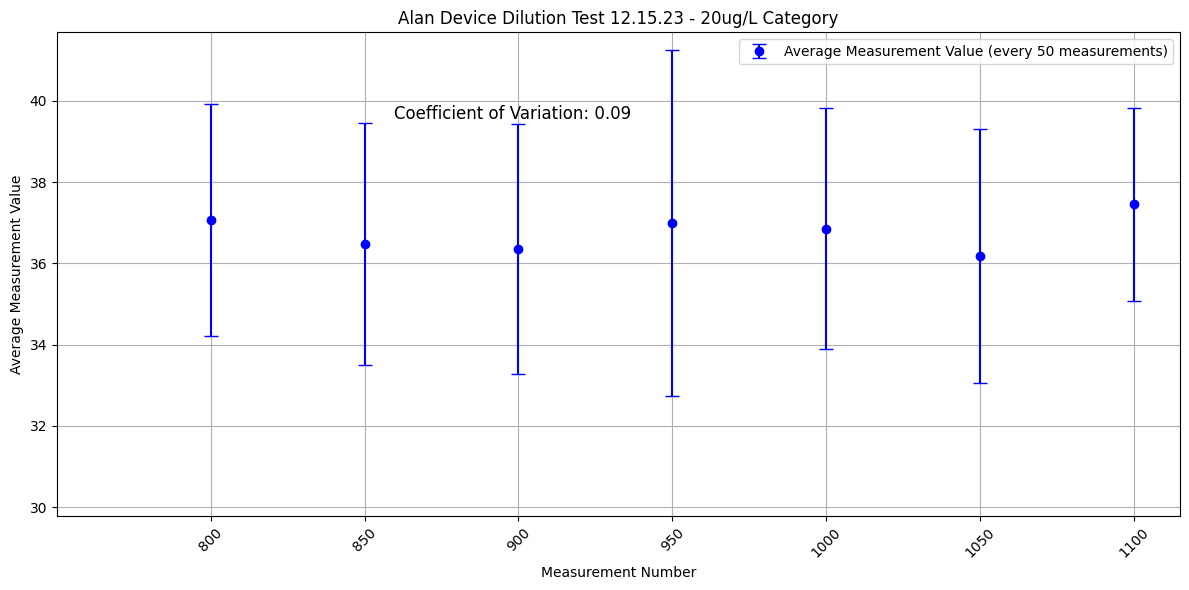

In [3]:
# Set the offset for the x-axis
x_offset = 50

# Create a scatter plot with error bars
plt.figure(figsize=(12, 6))

# Plot the average measurement value for every 50 measurements
plt.errorbar(means.index * 50, means, yerr=stds, fmt='o', color='blue', label='Average Measurement Value (every 50 measurements)', capsize=5)

plt.xlabel('Measurement Number')
plt.ylabel('Average Measurement Value')
plt.title('Alan Device Dilution Test 12.15.23 - 20ug/L Category')
plt.xticks(means.index * 50, rotation=45)  # Set x-axis ticks at the starting measurement number of each group
plt.grid(True)
plt.legend()

# Display the coefficient of variation on the graph
plt.text(0.3, 0.85, f'Coefficient of Variation: {cv:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.xlim(means.index[0] * 50 - x_offset, )  # Set x-axis limit to start slightly under the starting point of the y-axis values
plt.ylim(y_min)  # Set y-axis limit based on the calculated starting point
plt.show()
